#  TP 2: 

### 18 mars 2024

### Par Samuel Fortin, Philippe Truchon et Benjamin Trudel

## TP2.1 Décomposition QR par la méthode Householder

#### Fonctions générales

In [1]:
import fnmatch
import functools
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math


sns.set_theme(style="ticks", palette="deep")

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False



# Liste les noms de fichier d'un dossier
def listNameOfFiles(directory: str, extension="csv"):
    found_files = []
    for file in os.listdir(directory):
        if fnmatch.fnmatch(file, f"*.{extension}"):
            found_files.append(file)
    return found_files


# Lis et crée une matrice numpy à partir de chemin d'un fichier texte
def readTXT(path: str, header):
    fich = open(path, "r")
    fich_str = list(fich)
    fich.close()
    x = []
    for i in fich_str[header:]:
        elem_str = i.replace("\n", "")
        x.append(float(elem_str))
    return np.array(x)

def readcsv(path: str, header):
    arr = np.loadtxt(path,
                 delimiter=",", dtype=float, skiprows=header)
    return arr


path = os.path.abspath("")
files_name = listNameOfFiles(path)


### Questions:

### a)

<i>À l’aide des équations (2.1.2) et (2.1.3), démontrez que les matrices de réflexion Q_i sont orthogonales.</i>

Sachant que $v^T v = I$:

\begin{gather*}
 H_{m,i}H_{m,i}^T = H_{m,i}H_{m,i}
 \\
 H_{m,i}H_{m,i}^T = \Big( I - \frac{2 v v^T}{v^T v} \Big) \Big( I - \frac{2 v v^T}{v^T v} \Big)
 \\
 H_{m,i}H_{m,i}^T = I - \frac{ 4 v v^T }{ v^T v } + \frac{ 4 v (v^T v) v^T }{ (v^T v)^2 }
 \\
 H_{m,i}H_{m,i}^T = I - \frac{ 4 v v^T }{ v^T v } + \frac{ 4 v v^T }{ v^T v }
 \\
 H_{m,i}H_{m,i}^T = I
\end{gather*}  


$$ Q_i = \left [
\begin{matrix}
I_i & 0 \\
0 & H_{m,i} 
\end{matrix}
\right ]$$

En utilisant la forme générale du produit des matrices par blocs, on sait que:

$$ M^T = \left [
\begin{matrix}
A^T & B^T \\
C^T & D^T 
\end{matrix}
\right ] $$

Donc:

$$ Q_i = \left [
\begin{matrix}
I_i & 0 \\
0 & H_{m,i} 
\end{matrix}
\right ] = \left [
\begin{matrix}
I_i^T & 0 \\
0 & H_{m,i}^T 
\end{matrix}
\right ] = Q_i^T$$





### b)

<i>Démontrez l’équation (2.1.5) et que la matrice Q est orthogonale.</i>

 

En utilisant la propriété d'associativité : $(AB)^T = B^T A^T$ et sachant que $Q_{i}^T Q_{i} = I$

\begin{gather*}
    Q = \prod_{i=0}^{n-1} Q_i^T
\end{gather*}

\begin{gather*}
    (\prod_{i=0}^{n-1} Q_i)^T (\prod_{i=0}^{n-1} Q_i) = (\prod_{i=n-1}^{0} Q_i^T)(\prod_{i=0}^{n-1} Q_i) = \prod_{i=0}^{n-1} I = I
\end{gather*}

La matrice Q est donc orthogonale.

### c)

<i>Implémentez la fonction householder_qr qui prend en argument une matrice A et qui retourne les matrices Q
et R obtenues par la méthode de Householder.</i>


In [2]:
def householder_qr(A, inter=False):
    m, n = A.shape
    Q = np.identity(m)
    for i in range(n):
        H = np.identity(m)
        x = A[i:, i]

        e1 = np.zeros(len(x)).T
        e1[0] = 1

        v = np.array([x]).T+np.copysign(np.linalg.norm(x), x[0]) * np.array([e1]).T


        Ht = np.identity(x.shape[0])

        Ht -= (2 * (v @ v.T)/(v.T @ v))

        H[i:, i:] = Ht
        Q = Q @ H
        A = H @ A
        if inter:
            print(f'A{i}:\n', A.round(6)) 
    return Q, A

### d)

<i>À l’aide d’une matrice de dimension 4 × 3 de votre choix, testez votre fonction householder_qr et comparez les
résultats obtenus avec ceux obtenus à l’aide de la fonction numpy.linalg.qr. Les matrices sont-elles exactement
les mêmes ? Si non, est-ce un problème?</i>



In [3]:
a = np.random.randint(1,10,(4,3))
print(a)
Q, R = householder_qr(a)
print('Q:\n', Q.round(6))
print('R:\n', R.round(6))
r2 = np.linalg.qr(a, mode='complete')
print(r2)

[[8 4 7]
 [2 6 4]
 [6 3 8]
 [9 7 6]]
Q:
 [[-0.588172  0.278091 -0.037242 -0.758507]
 [-0.147043 -0.919839 -0.297936 -0.208589]
 [-0.441129  0.208568 -0.744839  0.455104]
 [-0.661693 -0.181829  0.595871  0.417179]]
R:
 [[-13.601471  -9.190183 -12.204563]
 [  0.        -5.053765  -1.155146]
 [ -0.        -0.        -3.83592 ]
 [ -0.        -0.         0.      ]]
QRResult(Q=array([[-0.5881717 ,  0.27809077, -0.03724195, -0.75850683],
       [-0.14704292, -0.91983871, -0.29793557, -0.20858938],
       [-0.44112877,  0.20856808, -0.74483892,  0.4551041 ],
       [-0.66169316, -0.18182858,  0.59587114,  0.41717876]]), R=array([[-13.60147051,  -9.19018278, -12.20456273],
       [  0.        ,  -5.05376499,  -1.15514628],
       [  0.        ,   0.        ,  -3.83592045],
       [  0.        ,   0.        ,   0.        ]]))


Les matrices sont les mêmes, mais la matrice Q pourrait avoir des signes différents selon la convention de signe utilisée qui menerait à la même matrice R.

### e)

<i>À l’aide de la matrice utilisée en d, illustrez comment la multiplication successive des matrices Q_i triangularise
progressivement la matrice A. Dans l’élan, assurez-vous que les matrices Q et R obtenues sont bien orthogonale et
triangulaire supérieure, respectivement.</i>


In [4]:
Q, R = householder_qr(a, inter=True)
I = Q @ Q.T
print(I)

A0:
 [[-13.601471  -9.190183 -12.204563]
 [ -0.         4.77877    2.221921]
 [  0.        -0.66369    2.665762]
 [ -0.         1.504465  -2.001356]]
A1:
 [[-13.601471  -9.190183 -12.204563]
 [  0.        -5.053765  -1.155146]
 [  0.         0.         2.893712]
 [ -0.        -0.        -2.518077]]
A2:
 [[-13.601471  -9.190183 -12.204563]
 [  0.        -5.053765  -1.155146]
 [ -0.        -0.        -3.83592 ]
 [ -0.        -0.         0.      ]]
[[ 1.00000000e+00  6.92035580e-18 -1.43819770e-16  1.79503870e-16]
 [ 6.92035580e-18  1.00000000e+00  8.13962086e-17  7.80695297e-18]
 [-1.43819770e-16  8.13962086e-17  1.00000000e+00 -1.12265712e-16]
 [ 1.79503870e-16  7.80695297e-18 -1.12265712e-16  1.00000000e+00]]


On oberve qu'à chaque itération la colonne la plus à gauche non triangulaire le devient en devenant des zéros en dessous de la diagonale. En même temps, on observe que la dernière matrice A qui est égale à R est triangulaire supérieur que tous les valeurs en dessous de la diagonale sont zéros. Finalement, on vérifie l'orthogonalité de Q en multipliant Q par sa transpose. Le résultat obtenu est la matrice identité comme prévu, confirmant l'orthogonalité. À noter, que les zéros dans ce cas ne sont pas exactement zéro à cause d'erreur numérique.

In [5]:
I[I< 1e-15] = 0
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## TP2.2 Mesures imprécises dans un jeu de bataille navale

### a)

<i>Modifiez votre code de décomposition QR pour qu’il retourne la décomposition QR réduite de la matrice d’entrée
lorsque l’argument additionnel reduite=True lui est passé.</i>

In [6]:
def householder_qr(A, inter=False, reduite=False):
    m, n = A.shape
    Q = np.identity(m)
    for i in range(n):
        H = np.identity(m)
        x = A[i:, i]

        e1 = np.zeros(len(x)).T
        e1[0] = 1

        v = np.array([x]).T+np.copysign(np.linalg.norm(x), x[0]) * np.array([e1]).T


        Ht = np.identity(x.shape[0])

        Ht -= (2 * (v @ v.T)/(v.T @ v))

        H[i:, i:] = Ht
        Q = Q @ H
        A = H @ A
        if inter:
            print(f'A{i}:\n', A.round(6)) 
    if reduite:
        A = A[:n,:]
        Q = Q[:,:n]
    return Q, A

### b)

<i>Utilisez votre code pour résoudre approximativement l’équation (2.2.4). Vous utiliserez les données fournies dans
le fichier bataille_navale_equipeXX.csv où vous remplacerez XX par votre numéro d’équipe dans la boîte de
dépôt sur MonPortail. </i>

In [7]:
data = readcsv(f'{path}\\{files_name[0]}', header=1)
x = data[:,0]
Y = data[:,1]
X = np.ones((len(x), 3))
X[:,1] = x
X[:,2] = x**2

Q,R = householder_qr(X, reduite=True)
print('Q:\n', Q.round(6))
print('R:\n', R.round(6))


right = Q.T @ Y
R_inv = np.linalg.inv(R)
alpha = np.array([R_inv @ right]).T
print(alpha)

print('\n', R @ alpha, '\n \n', right) # Vérif



Q:
 [[-0.353553 -0.540046  0.54002 ]
 [-0.353553 -0.385767  0.077167]
 [-0.353553 -0.23151  -0.23139 ]
 [-0.353553 -0.077124 -0.385793]
 [-0.353553  0.07718  -0.385761]
 [-0.353553  0.231497 -0.231398]
 [-0.353553  0.385695  0.077007]
 [-0.353553  0.540075  0.540148]]
R:
 [[-2.82842700e+00 -6.75289279e+03 -1.61968471e+07]
 [ 0.00000000e+00 -4.58301915e+02 -2.18840078e+06]
 [-0.00000000e+00  0.00000000e+00  6.48168046e+04]]
[[-6.83780044e+01]
 [ 2.25720748e+00]
 [-8.45177767e-04]]

 [[-1360.06282122]
 [  815.10517898]
 [  -54.78172217]] 
 
 [-1360.06282122   815.10517898   -54.78172217]


### c)

<i>Tracez les données (cercles noirs) et la solution estimée de la trajectoire(ligne pleine de la couleur de votre choix)
donnée par l’équation (2.2.3). </i>

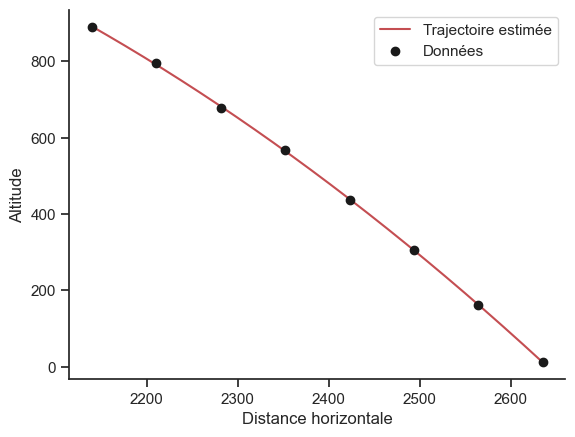

In [8]:
a0, a1, a2 = alpha[:,0]

xf = np.linspace(x[0], x[-1], 1000)

y = a0 + a1*xf + a2*xf**2

plt.plot(xf,y, 'r', label='Trajectoire estimée')
plt.plot(x, Y, 'ko', label='Données')
plt.ylabel('Altitude')
plt.xlabel('Distance horizontale')
plt.legend()
plt.show()


### d)

<i>Obtenez la position d’impact du projectile (à y = 0) en résolvant l’équation quadratique (2.2.3) pour x à l’aide
d’une implémentation personnelle de la méthode de la bissection. Comparez votre solution avec celle obtenue en
résolvant cette même équation analytiquement. Considérant que votre embarcation se situe à la position (x, y) =
(0, 0), quelle est la distance horizontale vous séparant du point d’impact ?
 </i>

2640.044784099625


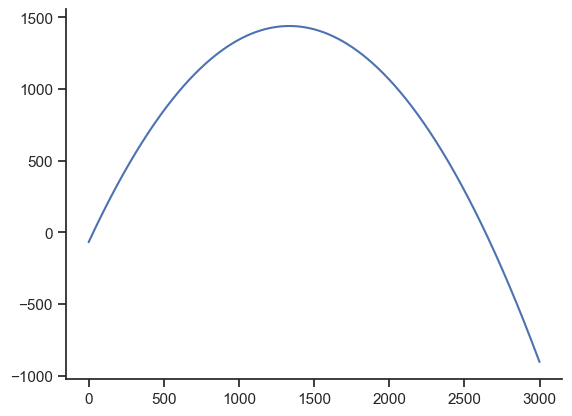

In [13]:
def f(x):
    return a0 + a1*x + a2*x**2

def prochains_points(xA, xB):
    xC = (xA+xB)/2
    if f(xA) * f(xC) > 0:
        xA = xC
    else:
        xB = xC
    return xA, xB, xC

xA, xB = 2500, 2800
xCp = np.inf
while True:
    xA, xB, xC = prochains_points(xA, xB)
    if abs(xC-xCp) < 1e-16:
        break
    xCp = xC
print(xC)

xv = np.linspace(0,3000, 1000)
plt.plot(xv, f(xv))
plt.show()
